Classification Report:
                precision    recall  f1-score   support

aluminium_foil       1.00      0.92      0.96        39
      corduroy       0.91      0.97      0.94        40
   orange_peel       0.98      0.98      0.98        43

      accuracy                           0.96       122
     macro avg       0.96      0.96      0.96       122
  weighted avg       0.96      0.96      0.96       122


Confusion Matrix:
[[36  3  0]
 [ 0 39  1]
 [ 0  1 42]]


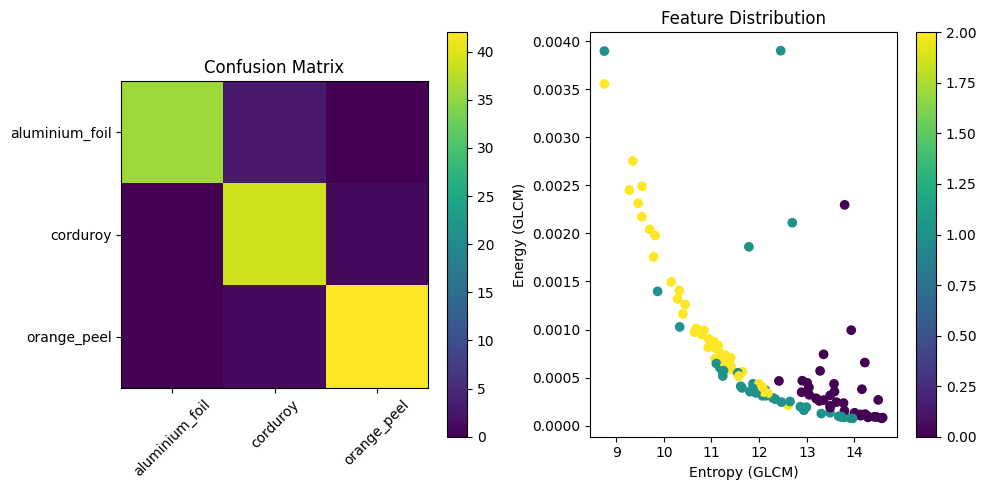

In [ ]:
import os
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import cv2
from skimage.feature import graycomatrix, graycoprops
from scipy.fft import fft2
import matplotlib.pyplot as plt

def load_images_from_folder(folder_path):
    """Load images from a folder and return them in a list."""
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
    return images

def extract_features(image):
    """Extract features (GLCM and FFT) from an image."""
    # GLCM features
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    entropy = -np.sum(glcm * np.log2(glcm + (glcm == 0)))  # Adding small epsilon to avoid log(0)
    energy = np.sum(glcm**2)

    # FFT features
    f_transform = np.abs(fft2(image))
    fft_mean = np.mean(f_transform)
    fft_std = np.std(f_transform)

    return [entropy, energy, fft_mean, fft_std]

# Define paths
base_path = "kth_tips_grey_200x200/KTH_TIPS"
classes = ["aluminium_foil", "corduroy", "orange_peel"]

# Prepare data
all_features = []
all_labels = []

# Load images and extract features
for class_idx, class_name in enumerate(classes):
    folder_path = os.path.join(base_path, class_name)
    images = load_images_from_folder(folder_path)

    for image in images:
        features = extract_features(image)
        all_features.append(features)
        all_labels.append(class_idx)

# Convert to numpy arrays
data = np.array(all_features)
labels = np.array(all_labels)

# Split data into training and testing sets
indices = np.arange(len(data))
np.random.shuffle(indices)
split = len(indices) // 2

train_idx = indices[:split]
test_idx = indices[split:]

data_i_train = data[train_idx]
data_o_train = labels[train_idx]
data_i_test = data[test_idx]
data_o_test = labels[test_idx]

# Create and train KNN classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data_i_train, data_o_train)

# Make predictions
predicted = neigh.predict(data_i_test)
expected = data_o_test

# Print results
print("Classification Report:")
print(metrics.classification_report(expected, predicted,
                                 target_names=classes))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(expected, predicted))

# Visualize results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Confusion Matrix")
plt.imshow(metrics.confusion_matrix(expected, predicted), interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(classes)), classes, rotation=45)
plt.yticks(range(len(classes)), classes)

# Plot feature distribution
plt.subplot(1, 2, 2)
plt.title("Feature Distribution")
plt.scatter(data_i_test[:, 0], data_i_test[:, 1], c=predicted, cmap='viridis')
plt.xlabel("Entropy (GLCM)")
plt.ylabel("Energy (GLCM)")
plt.colorbar()
plt.tight_layout()
plt.show()

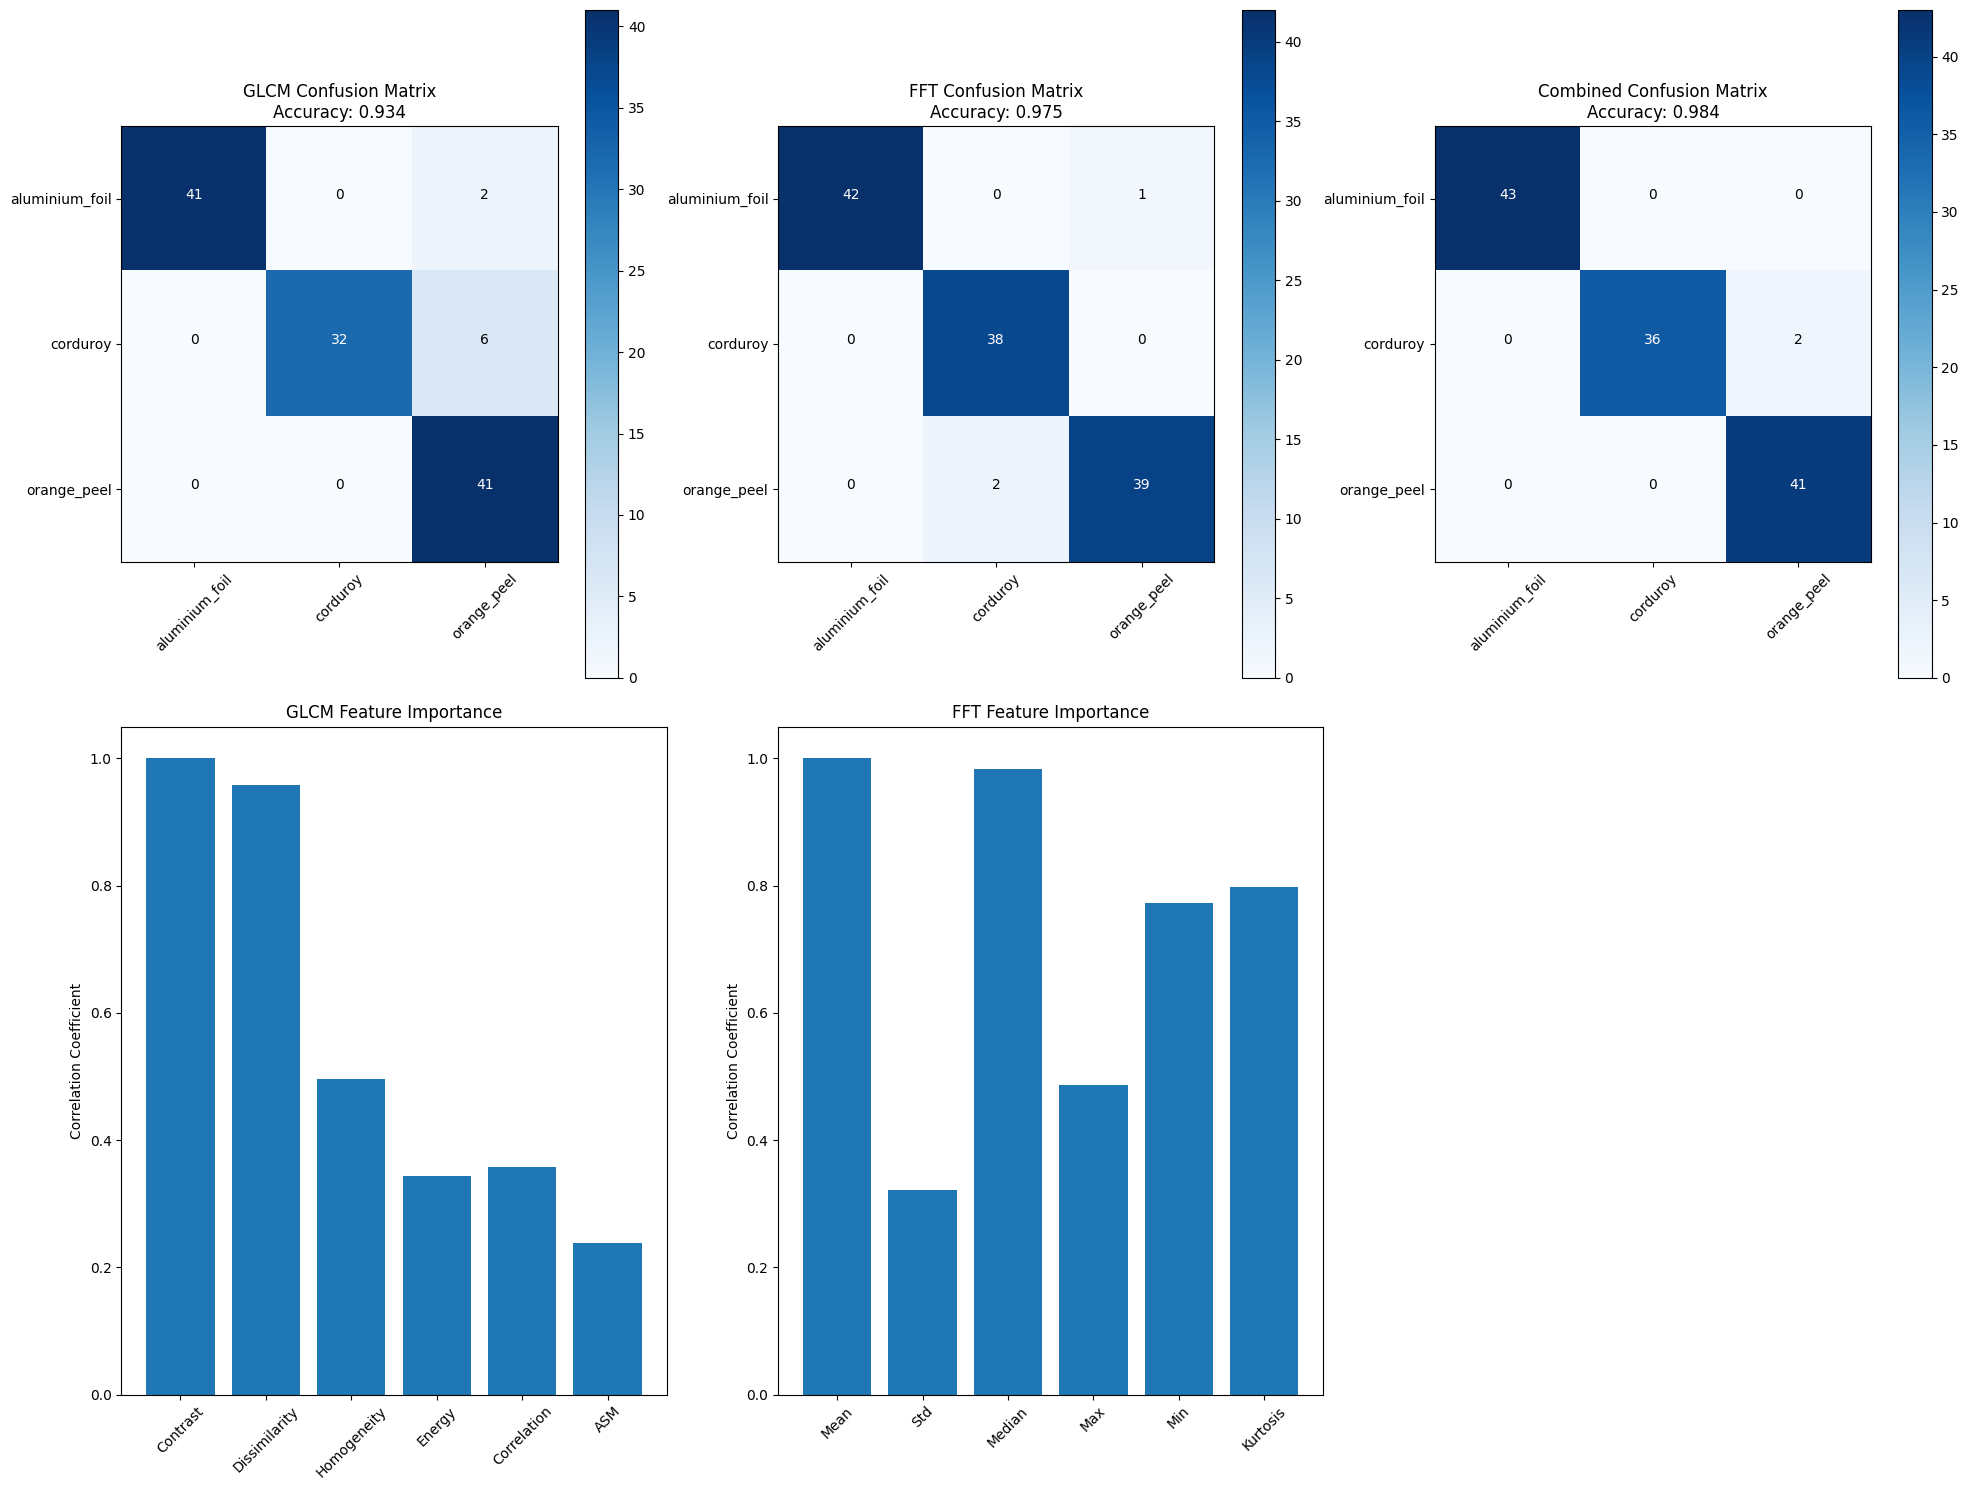


GLCM Results:
Accuracy: 0.934
Classification Report:
                precision    recall  f1-score   support

aluminium_foil       1.00      0.95      0.98        43
      corduroy       1.00      0.84      0.91        38
   orange_peel       0.84      1.00      0.91        41

      accuracy                           0.93       122
     macro avg       0.95      0.93      0.93       122
  weighted avg       0.95      0.93      0.94       122


FFT Results:
Accuracy: 0.975
Classification Report:
                precision    recall  f1-score   support

aluminium_foil       1.00      0.98      0.99        43
      corduroy       0.95      1.00      0.97        38
   orange_peel       0.97      0.95      0.96        41

      accuracy                           0.98       122
     macro avg       0.97      0.98      0.98       122
  weighted avg       0.98      0.98      0.98       122


Combined Results:
Accuracy: 0.984
Classification Report:
                precision    recall  f1-score

In [ ]:
now do the same thing but change the algorithm gaussian naive bayes

Training set size: 120
Test set size: 123

Classification Report for GLCM Features:
                precision    recall  f1-score   support

aluminium_foil       1.00      0.98      0.99        41
      corduroy       0.91      0.73      0.81        44
   orange_peel       0.75      0.95      0.84        38

      accuracy                           0.88       123
     macro avg       0.89      0.88      0.88       123
  weighted avg       0.89      0.88      0.88       123


Confusion Matrix for GLCM Features:
[[40  1  0]
 [ 0 32 12]
 [ 0  2 36]]

Classification Report for FFT Features:
                precision    recall  f1-score   support

aluminium_foil       0.95      0.95      0.95        41
      corduroy       0.95      0.95      0.95        44
   orange_peel       1.00      1.00      1.00        38

      accuracy                           0.97       123
     macro avg       0.97      0.97      0.97       123
  weighted avg       0.97      0.97      0.97       123


Confusion 

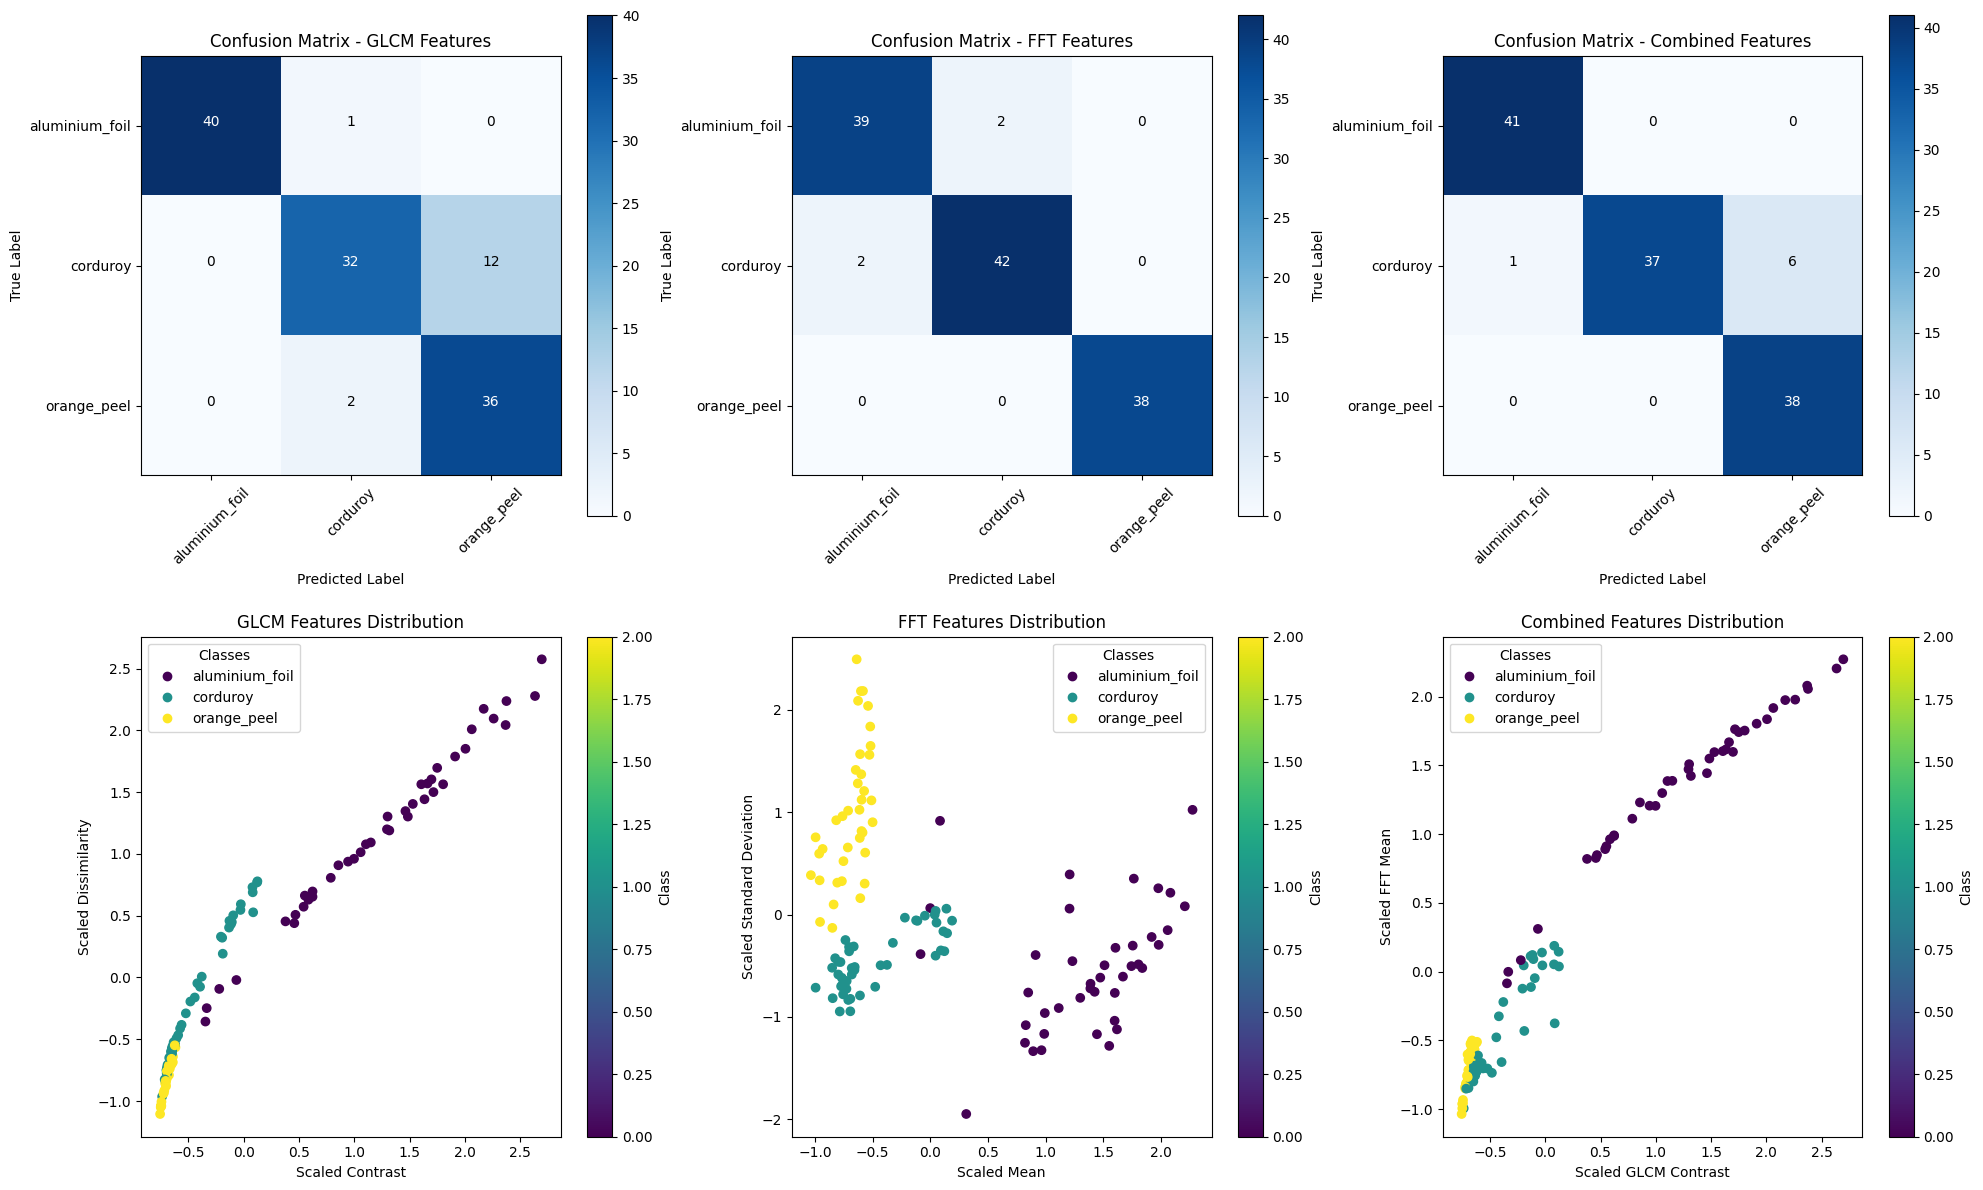


Accuracy Comparison:
GLCM Features: 0.8780
FFT Features: 0.9675
Combined Features: 0.9431


In [ ]:
import os
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import cv2
from skimage.feature import graycomatrix, graycoprops
from scipy.fft import fft2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# [Previous helper functions remain the same: load_images_from_folder, extract_glcm_features, extract_fft_features]

def evaluate_classifier(y_true, y_pred, class_names, title):
    """Evaluate classifier performance and print metrics."""
    print(f"\nClassification Report for {title}:")
    print(metrics.classification_report(y_true, y_pred, target_names=class_names))

    print(f"\nConfusion Matrix for {title}:")
    conf_matrix = metrics.confusion_matrix(y_true, y_pred)
    print(conf_matrix)
    return conf_matrix

def plot_confusion_matrix(conf_matrix, classes, title, subplot_idx):
    """Plot confusion matrix."""
    plt.subplot(2, 3, subplot_idx)
    plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add text annotations
    thresh = conf_matrix.max() / 2.
    for i, j in np.ndindex(conf_matrix.shape):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                horizontalalignment="center",
                color="white" if conf_matrix[i, j] > thresh else "black")

# Define paths and load data
base_path = "kth_tips_grey_200x200/KTH_TIPS"
classes = ["aluminium_foil", "corduroy", "orange_peel"]

# Load and preprocess data
glcm_features = []
fft_features = []
labels = []

for class_idx, class_name in enumerate(classes):
    class_path = os.path.join(base_path, class_name)
    class_images = load_images_from_folder(class_path)

    for image in class_images:
        glcm_feats = extract_glcm_features(image)
        fft_feats = extract_fft_features(image)

        glcm_features.append(glcm_feats)
        fft_features.append(fft_feats)
        labels.append(class_idx)

glcm_features = np.array(glcm_features)
fft_features = np.array(fft_features)
combined_features = np.hstack((glcm_features, fft_features))
labels = np.array(labels)

# Calculate test_size to get exactly 122 test samples
n_samples = len(labels)
test_size = 122 / n_samples

# Split data
from sklearn.model_selection import train_test_split
glcm_train, glcm_test, fft_train, fft_test, combined_train, combined_test, y_train, y_test = train_test_split(
    glcm_features, fft_features, combined_features, labels,
    test_size=test_size, random_state=42
)

print(f"Training set size: {len(y_train)}")
print(f"Test set size: {len(y_test)}")

# Scale features
scaler_glcm = StandardScaler()
scaler_fft = StandardScaler()
scaler_combined = StandardScaler()

glcm_train_scaled = scaler_glcm.fit_transform(glcm_train)
glcm_test_scaled = scaler_glcm.transform(glcm_test)

fft_train_scaled = scaler_fft.fit_transform(fft_train)
fft_test_scaled = scaler_fft.transform(fft_test)

combined_train_scaled = scaler_combined.fit_transform(combined_train)
combined_test_scaled = scaler_combined.transform(combined_test)

# Train and evaluate classifiers
# 1. GLCM Classifier
gnb_glcm = GaussianNB()
gnb_glcm.fit(glcm_train_scaled, y_train)
y_pred_glcm = gnb_glcm.predict(glcm_test_scaled)
conf_matrix_glcm = evaluate_classifier(y_test, y_pred_glcm, classes, "GLCM Features")

# 2. FFT Classifier
gnb_fft = GaussianNB()
gnb_fft.fit(fft_train_scaled, y_train)
y_pred_fft = gnb_fft.predict(fft_test_scaled)
conf_matrix_fft = evaluate_classifier(y_test, y_pred_fft, classes, "FFT Features")

# 3. Combined Classifier
gnb_combined = GaussianNB()
gnb_combined.fit(combined_train_scaled, y_train)
y_pred_combined = gnb_combined.predict(combined_test_scaled)
conf_matrix_combined = evaluate_classifier(y_test, y_pred_combined, classes, "Combined Features")

# Visualization
plt.figure(figsize=(20, 12))

# Plot confusion matrices
plot_confusion_matrix(conf_matrix_glcm, classes, "GLCM Features", 1)
plot_confusion_matrix(conf_matrix_fft, classes, "FFT Features", 2)
plot_confusion_matrix(conf_matrix_combined, classes, "Combined Features", 3)

# Feature distribution plots
# GLCM
plt.subplot(2, 3, 4)
scatter_glcm = plt.scatter(glcm_test_scaled[:, 0],
                          glcm_test_scaled[:, 1],
                          c=y_test,
                          cmap='viridis')
plt.title("GLCM Features Distribution")
plt.xlabel("Scaled Contrast")
plt.ylabel("Scaled Dissimilarity")
plt.colorbar(label='Class')
plt.legend(handles=scatter_glcm.legend_elements()[0],
          labels=classes,
          title="Classes")

# FFT
plt.subplot(2, 3, 5)
scatter_fft = plt.scatter(fft_test_scaled[:, 0],
                         fft_test_scaled[:, 1],
                         c=y_test,
                         cmap='viridis')
plt.title("FFT Features Distribution")
plt.xlabel("Scaled Mean")
plt.ylabel("Scaled Standard Deviation")
plt.colorbar(label='Class')
plt.legend(handles=scatter_fft.legend_elements()[0],
          labels=classes,
          title="Classes")

# Combined
plt.subplot(2, 3, 6)
scatter_combined = plt.scatter(combined_test_scaled[:, 0],  # First GLCM feature
                             combined_test_scaled[:, 5],    # First FFT feature
                             c=y_test,
                             cmap='viridis')
plt.title("Combined Features Distribution")
plt.xlabel("Scaled GLCM Contrast")
plt.ylabel("Scaled FFT Mean")
plt.colorbar(label='Class')
plt.legend(handles=scatter_combined.legend_elements()[0],
          labels=classes,
          title="Classes")

plt.tight_layout()
plt.show()

# Print overall accuracy comparison
print("\nAccuracy Comparison:")
print(f"GLCM Features: {metrics.accuracy_score(y_test, y_pred_glcm):.4f}")
print(f"FFT Features: {metrics.accuracy_score(y_test, y_pred_fft):.4f}")
print(f"Combined Features: {metrics.accuracy_score(y_test, y_pred_combined):.4f}")

Dataset split sizes:
Training samples: 121
Test samples: 122

Class distribution in test set:
Class aluminium_foil: 40 samples
Class corduroy: 41 samples
Class orange_peel: 41 samples

Classification Report for GLCM Features:
                precision    recall  f1-score   support

aluminium_foil       1.00      0.95      0.97        40
      corduroy       0.92      0.80      0.86        41
   orange_peel       0.83      0.98      0.90        41

      accuracy                           0.91       122
     macro avg       0.92      0.91      0.91       122
  weighted avg       0.92      0.91      0.91       122


Confusion Matrix for GLCM Features:
[[38  2  0]
 [ 0 33  8]
 [ 0  1 40]]

Classification Report for FFT Features:
                precision    recall  f1-score   support

aluminium_foil       0.97      0.93      0.95        40
      corduroy       0.87      0.98      0.92        41
   orange_peel       1.00      0.93      0.96        41

      accuracy                        

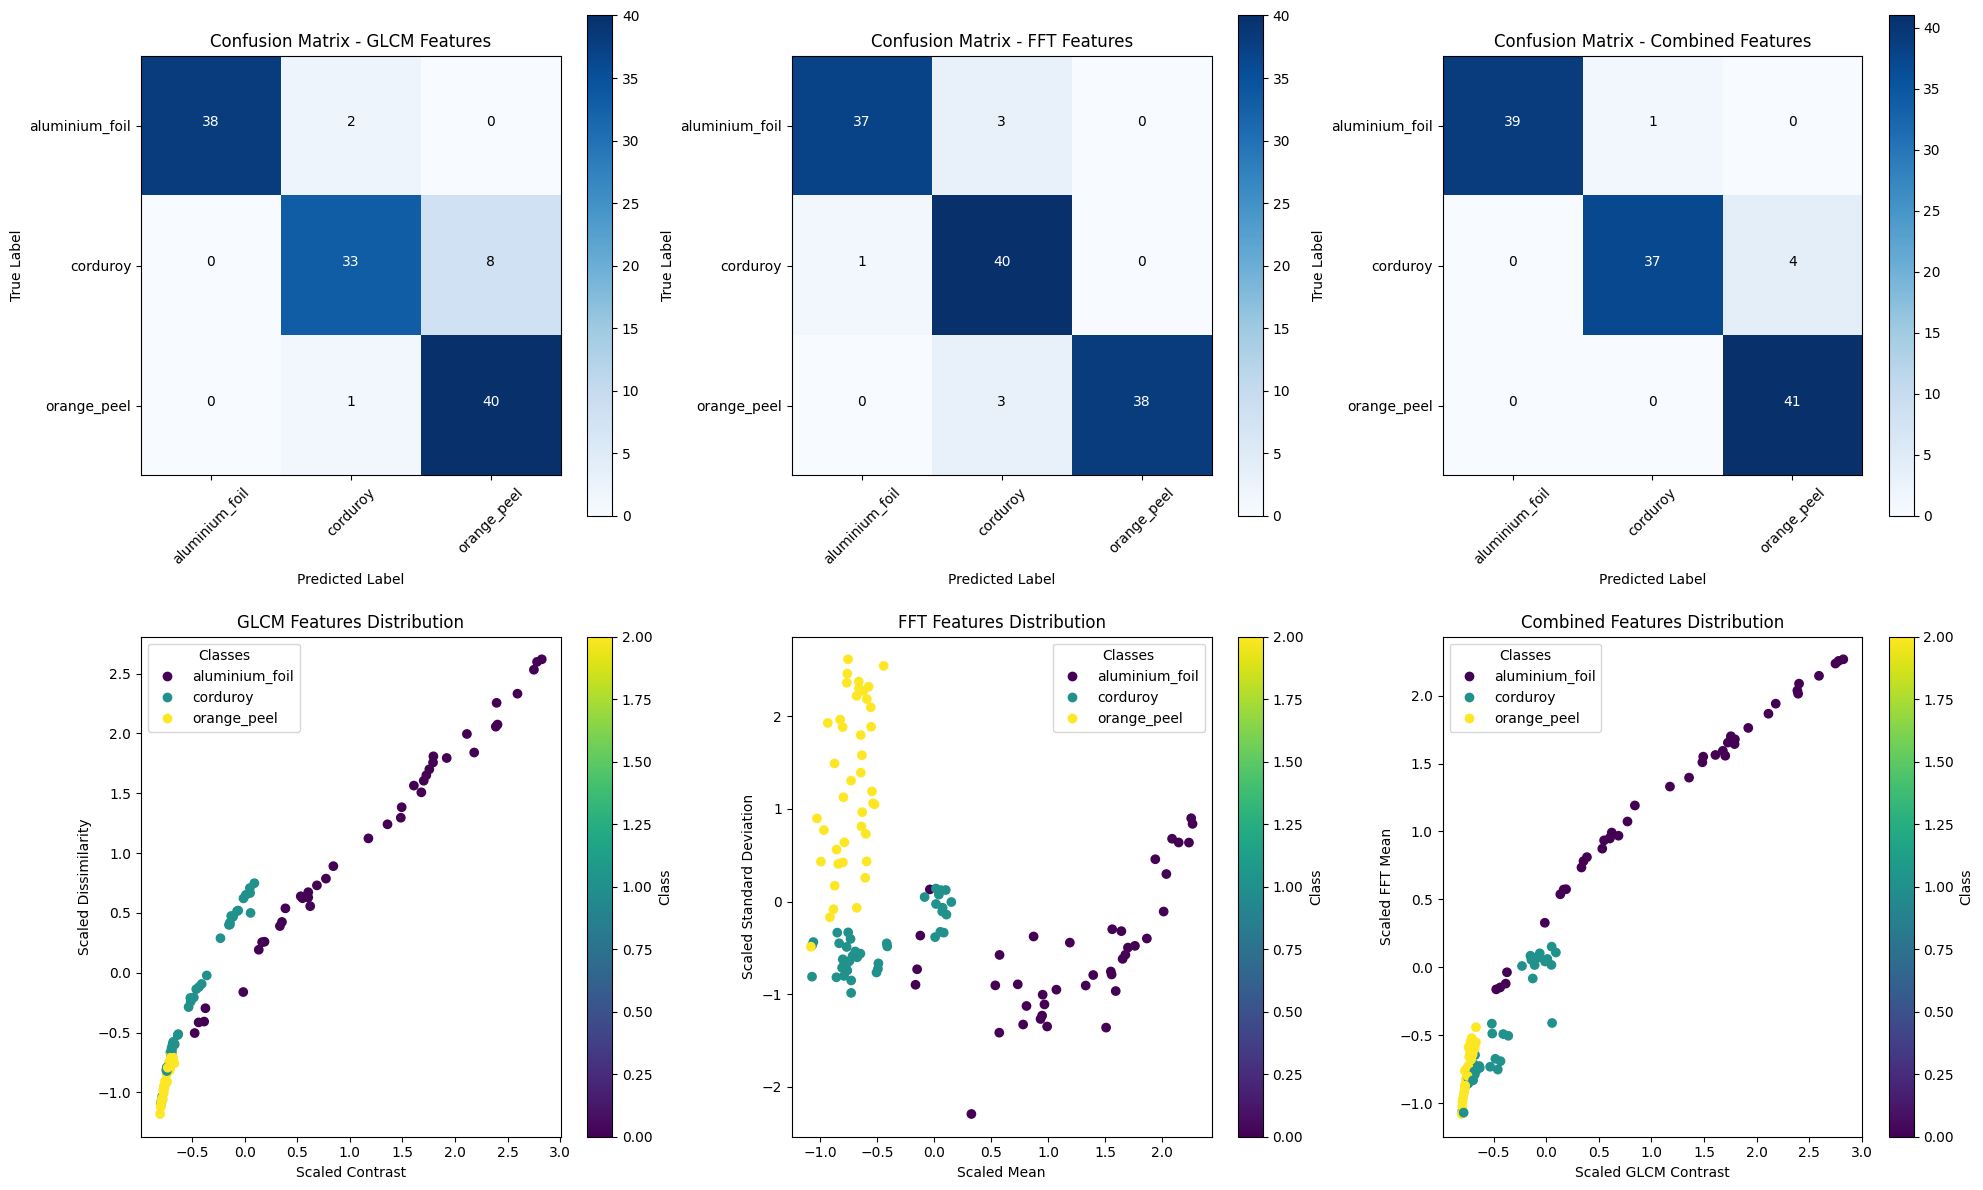


Accuracy Comparison:
GLCM Features: 0.9098
FFT Features: 0.9426
Combined Features: 0.9590


In [ ]:
import os
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import cv2
from skimage.feature import graycomatrix, graycoprops
from scipy.fft import fft2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

# [Previous helper functions remain the same]

# Define paths and load data
base_path = "kth_tips_grey_200x200/KTH_TIPS"
classes = ["aluminium_foil", "corduroy", "orange_peel"]

# Load and preprocess data
glcm_features = []
fft_features = []
labels = []

for class_idx, class_name in enumerate(classes):
    class_path = os.path.join(base_path, class_name)
    class_images = load_images_from_folder(class_path)

    for image in class_images:
        glcm_feats = extract_glcm_features(image)
        fft_feats = extract_fft_features(image)

        glcm_features.append(glcm_feats)
        fft_features.append(fft_feats)
        labels.append(class_idx)

glcm_features = np.array(glcm_features)
fft_features = np.array(fft_features)
combined_features = np.hstack((glcm_features, fft_features))
labels = np.array(labels)

# Use StratifiedShuffleSplit to ensure equal distribution
sss = StratifiedShuffleSplit(n_splits=1, test_size=122, random_state=42)

# Get train and test indices
for train_idx, test_idx in sss.split(combined_features, labels):
    glcm_train = glcm_features[train_idx]
    glcm_test = glcm_features[test_idx]
    fft_train = fft_features[train_idx]
    fft_test = fft_features[test_idx]
    combined_train = combined_features[train_idx]
    combined_test = combined_features[test_idx]
    y_train = labels[train_idx]
    y_test = labels[test_idx]

print("Dataset split sizes:")
print(f"Training samples: {len(y_train)}")
print(f"Test samples: {len(y_test)}")
print("\nClass distribution in test set:")
unique, counts = np.unique(y_test, return_counts=True)
for class_idx, count in zip(unique, counts):
    print(f"Class {classes[class_idx]}: {count} samples")

# Scale features
scaler_glcm = StandardScaler()
scaler_fft = StandardScaler()
scaler_combined = StandardScaler()

glcm_train_scaled = scaler_glcm.fit_transform(glcm_train)
glcm_test_scaled = scaler_glcm.transform(glcm_test)

fft_train_scaled = scaler_fft.fit_transform(fft_train)
fft_test_scaled = scaler_fft.transform(fft_test)

combined_train_scaled = scaler_combined.fit_transform(combined_train)
combined_test_scaled = scaler_combined.transform(combined_test)

# Train and evaluate classifiers
# 1. GLCM Classifier
gnb_glcm = GaussianNB()
gnb_glcm.fit(glcm_train_scaled, y_train)
y_pred_glcm = gnb_glcm.predict(glcm_test_scaled)
conf_matrix_glcm = evaluate_classifier(y_test, y_pred_glcm, classes, "GLCM Features")

# 2. FFT Classifier
gnb_fft = GaussianNB()
gnb_fft.fit(fft_train_scaled, y_train)
y_pred_fft = gnb_fft.predict(fft_test_scaled)
conf_matrix_fft = evaluate_classifier(y_test, y_pred_fft, classes, "FFT Features")

# 3. Combined Classifier
gnb_combined = GaussianNB()
gnb_combined.fit(combined_train_scaled, y_train)
y_pred_combined = gnb_combined.predict(combined_test_scaled)
conf_matrix_combined = evaluate_classifier(y_test, y_pred_combined, classes, "Combined Features")

# Visualization
plt.figure(figsize=(20, 12))

# Plot confusion matrices
plot_confusion_matrix(conf_matrix_glcm, classes, "GLCM Features", 1)
plot_confusion_matrix(conf_matrix_fft, classes, "FFT Features", 2)
plot_confusion_matrix(conf_matrix_combined, classes, "Combined Features", 3)

# Feature distribution plots
# GLCM
plt.subplot(2, 3, 4)
scatter_glcm = plt.scatter(glcm_test_scaled[:, 0],
                          glcm_test_scaled[:, 1],
                          c=y_test,
                          cmap='viridis')
plt.title("GLCM Features Distribution")
plt.xlabel("Scaled Contrast")
plt.ylabel("Scaled Dissimilarity")
plt.colorbar(label='Class')
plt.legend(handles=scatter_glcm.legend_elements()[0],
          labels=classes,
          title="Classes")

# FFT
plt.subplot(2, 3, 5)
scatter_fft = plt.scatter(fft_test_scaled[:, 0],
                         fft_test_scaled[:, 1],
                         c=y_test,
                         cmap='viridis')
plt.title("FFT Features Distribution")
plt.xlabel("Scaled Mean")
plt.ylabel("Scaled Standard Deviation")
plt.colorbar(label='Class')
plt.legend(handles=scatter_fft.legend_elements()[0],
          labels=classes,
          title="Classes")

# Combined
plt.subplot(2, 3, 6)
scatter_combined = plt.scatter(combined_test_scaled[:, 0],  # First GLCM feature
                             combined_test_scaled[:, 5],    # First FFT feature
                             c=y_test,
                             cmap='viridis')
plt.title("Combined Features Distribution")
plt.xlabel("Scaled GLCM Contrast")
plt.ylabel("Scaled FFT Mean")
plt.colorbar(label='Class')
plt.legend(handles=scatter_combined.legend_elements()[0],
          labels=classes,
          title="Classes")

plt.tight_layout()
plt.show()

# Print overall accuracy comparison
print("\nAccuracy Comparison:")
print(f"GLCM Features: {metrics.accuracy_score(y_test, y_pred_glcm):.4f}")
print(f"FFT Features: {metrics.accuracy_score(y_test, y_pred_fft):.4f}")
print(f"Combined Features: {metrics.accuracy_score(y_test, y_pred_combined):.4f}")